In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
import FlowCal as FC
from scipy.optimize import curve_fit
#from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import warnings
import os
from shutil import copyfile
warnings.filterwarnings('ignore')

In [3]:
def transf_pos(x,K=2.0,y0=0.001,ym=1.5,n=2):
    result=ym*((x/K)**n)/(1+(x/K)**n)+ym*y0
    return result

def transf_neg(x,K=2.0,y0=0.001,ym=1.5,n=2):
    result=ym/(1+(x/K)**n)+y0*ym
    return result

def activate(x,K,y0,ym,n):
    result=transf_pos(x.sum(),K,y0,ym,n).sum()
    return result

In [53]:
def channel_median(facsdata_list,channel,flip_tag=True):
    channel_median=[]
    
    if flip_tag==True:
        for i in np.flip(np.arange(len(facsdata_list))):
            channel_median.append(np.median(facsdata_list[i][:,channel]))
    
    else:
        for i in np.arange(0,len(facsdata_list)):
            channel_median.append(np.median(facsdata_list[i][:,channel]))
        
    return np.array(channel_median)


In [25]:
Fig2b_folder_='Fig2b/'
Fig2d_folder_='Fig2d/'

In [22]:
gatefrac=0.8

tmp=FC.io.FCSData(Fig2b_folder_+'trial1_+placo_array_noaTc.fcs')
XL267C1_LB_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)

#-----------
tmp=FC.io.FCSData(Fig2b_folder_+'trial1_+placo_array_+aTc.fcs')
XL267C1_aTc_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)

#----------
tmp=FC.io.FCSData(Fig2b_folder_+'trial2_+placo_array_noaTc.fcs')
XL267C2_LB_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)

tmp=FC.io.FCSData(Fig2b_folder_+'trial2_+placo_array_+aTc.fcs')
XL267C2_aTc_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)

#----------
tmp=FC.io.FCSData(Fig2b_folder_+'trial3_+placo_array_noaTc.fcs')
XL267C3_LB_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)

tmp=FC.io.FCSData(Fig2b_folder_+'trial3_+placo_array_+aTc.fcs')
XL267C3_aTc_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)

In [23]:
gatefrac=0.8

tmp=FC.io.FCSData(Fig2b_folder_+'trial1_noplaco_array_noaTc.fcs')
XL267_LR206_C1_LB_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)

tmp=FC.io.FCSData(Fig2b_folder_+'trial2_noplaco_array_noaTc.fcs')
XL267_LR206_C2_LB_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)

tmp=FC.io.FCSData(Fig2b_folder_+'trial3_noplaco_array_noaTc.fcs')
XL267_LR206_C3_LB_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)

tmp=FC.io.FCSData(Fig2b_folder_+'trial4_noplaco_array_noaTc.fcs')
XL267_LR206_C4_LB_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)

#-----
tmp=FC.io.FCSData(Fig2b_folder_+'trial1_noplaco_array_+aTc.fcs')
XL267_LR206_C1_aTc_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)

tmp=FC.io.FCSData(Fig2b_folder_+'trial2_noplaco_array_+aTc.fcs')
XL267_LR206_C2_aTc_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)

tmp=FC.io.FCSData(Fig2b_folder_+'trial3_noplaco_array_+aTc.fcs')
XL267_LR206_C3_aTc_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)

tmp=FC.io.FCSData(Fig2b_folder_+'trial4_noplaco_array_+aTc.fcs')
XL267_LR206_C4_aTc_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)


In [37]:
path_='/Users/ximing/Documents/NN_project/NN_project_revision/github_folder/experiment_data/'
os.mkdir(path_+Fig2d_folder_)

In [9]:
# copy files to organized folder
data_file=path_0609+'02-Well-A2.fcs'
newname='trial1_+placo_array_noaTc.fcs'
copyfile(data_file,path_+folder_name+newname)

data_file=path_0609+'02-Well-A3.fcs'
newname='trial1_+placo_array_+aTc.fcs'
copyfile(data_file,path_+folder_name+newname)

#-----------
data_file=path_0609+'02-Well-B2.fcs'
newname='trial2_+placo_array_noaTc.fcs'
copyfile(data_file,path_+folder_name+newname)

data_file=path_0609+'02-Well-B3.fcs'
newname='trial2_+placo_array_+aTc.fcs'
copyfile(data_file,path_+folder_name+newname)

#-----------
data_file=path_0609+'02-Well-C2.fcs'
newname='trial3_+placo_array_noaTc.fcs'
copyfile(data_file,path_+folder_name+newname)

data_file=path_0609+'02-Well-C3.fcs'
newname='trial3_+placo_array_+aTc.fcs'
copyfile(data_file,path_+folder_name+newname)


# copy files to organized folder
data_file=path_0701+'01-Well-A2_LR206+XL267C1_LB.fcs'
newname='trial1_noplaco_array_noaTc.fcs'
copyfile(data_file,path_+folder_name+newname)

data_file=path_0701+'01-Well-A3_LR206+XL267C1_aTc_200ngml.fcs'
newname='trial1_noplaco_array_+aTc.fcs'
copyfile(data_file,path_+folder_name+newname)

#-----------
data_file=path_0701+'01-Well-B2.fcs'
newname='trial2_noplaco_array_noaTc.fcs'
copyfile(data_file,path_+folder_name+newname)

data_file=path_0701+'01-Well-B3.fcs'
newname='trial2_noplaco_array_+aTc.fcs'
copyfile(data_file,path_+folder_name+newname)

#-----------
data_file=path_0701+'01-Well-C2.fcs'
newname='trial3_noplaco_array_noaTc.fcs'
copyfile(data_file,path_+folder_name+newname)

data_file=path_0701+'01-Well-C3.fcs'
newname='trial3_noplaco_array_+aTc.fcs'
copyfile(data_file,path_+folder_name+newname)


#-----------
data_file=path_0701+'01-Well-D2.fcs'
newname='trial4_noplaco_array_noaTc.fcs'
copyfile(data_file,path_+folder_name+newname)

data_file=path_0701+'01-Well-D3.fcs'
newname='trial4_noplaco_array_+aTc.fcs'
copyfile(data_file,path_+folder_name+newname)

'/Users/ximing/Documents/NN_project/NN_project_revision/github_folder/experiment_data/Fig2b/trial3_+placo_array_+aTc.fcs'

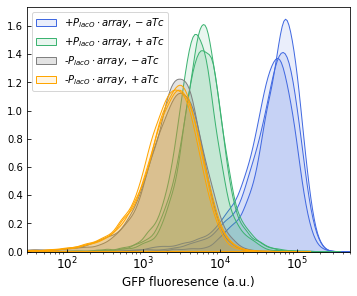

In [26]:
# Fig S24
fig=plt.figure(figsize=(5.8,4.5))
ax=fig.add_subplot(111)
ax.set_xscale('log')

alpha_=0.11
sns.kdeplot(XL267C1_LB_gated[:,'FL1-A'],color='royalblue',fill=1,alpha=alpha_,label='+$P_{lacO}\cdot array, -aTc$')
sns.kdeplot(XL267C2_LB_gated[:,'FL1-A'],color='royalblue',fill=1,alpha=alpha_)
sns.kdeplot(XL267C3_LB_gated[:,'FL1-A'],color='royalblue',fill=1,alpha=alpha_)

sns.kdeplot(XL267C1_aTc_gated[:,'FL1-A'],color='mediumseagreen',fill=1,alpha=alpha_,label='+$P_{lacO}\cdot array, +aTc$')
sns.kdeplot(XL267C2_aTc_gated[:,'FL1-A'],color='mediumseagreen',fill=1,alpha=alpha_)
sns.kdeplot(XL267C3_aTc_gated[:,'FL1-A'],color='mediumseagreen',fill=1,alpha=alpha_)


sns.kdeplot(XL267_LR206_C1_LB_gated[:,'FL1-A'],color='grey',fill=1,alpha=alpha_*2,label='-$P_{lacO}\cdot array, -aTc$')
sns.kdeplot(XL267_LR206_C2_LB_gated[:,'FL1-A'],color='grey',fill=1,alpha=alpha_*2)
sns.kdeplot(XL267_LR206_C3_LB_gated[:,'FL1-A'],color='grey',fill=1,alpha=alpha_*2)

sns.kdeplot(XL267_LR206_C1_aTc_gated[:,'FL1-A'],color='orange',fill=1,alpha=alpha_,label='-$P_{lacO}\cdot array, +aTc$')
sns.kdeplot(XL267_LR206_C2_aTc_gated[:,'FL1-A'],color='orange',fill=1,alpha=alpha_)
sns.kdeplot(XL267_LR206_C3_aTc_gated[:,'FL1-A'],color='orange',fill=1,alpha=alpha_)

ax.legend(loc='upper left',fontsize=10)
ax.set_xlim([0.3*10**2,0.5*10**6])

ax.set_ylabel('')
ax.set_xlabel('GFP fluoresence (a.u.)',size=12)


ax.tick_params(direction='in')
ax.tick_params(axis='x',labelsize=12)


In [33]:
LB_median=[np.median(XL267C1_LB_gated[:,'FL1-A']),\
           np.median(XL267C2_LB_gated[:,'FL1-A']),\
           np.median(XL267C3_LB_gated[:,'FL1-A']),\
          ]

aTc_median=[np.median(XL267C1_aTc_gated[:,'FL1-A']),\
           np.median(XL267C2_aTc_gated[:,'FL1-A']),\
           np.median(XL267C3_aTc_gated[:,'FL1-A']),\
          ]
XL267C1_=[np.median(XL267C1_LB_gated[:,'FL1-A']),np.median(XL267C1_aTc_gated[:,'FL1-A'])]
XL267C2_=[np.median(XL267C2_LB_gated[:,'FL1-A']),np.median(XL267C2_aTc_gated[:,'FL1-A'])]
XL267C3_=[np.median(XL267C3_LB_gated[:,'FL1-A']),np.median(XL267C3_aTc_gated[:,'FL1-A'])]

In [34]:
XL267_LR206_LB_median=[np.median(XL267_LR206_C1_LB_gated[:,'FL1-A']),\
                       np.median(XL267_LR206_C2_LB_gated[:,'FL1-A']),\
                       np.median(XL267_LR206_C3_LB_gated[:,'FL1-A']),\
                       np.median(XL267_LR206_C4_LB_gated[:,'FL1-A'])
                  ]

XL267_LR206_aTc_median=[np.median(XL267_LR206_C1_aTc_gated[:,'FL1-A']),\
                       np.median(XL267_LR206_C2_aTc_gated[:,'FL1-A']),\
                       np.median(XL267_LR206_C3_aTc_gated[:,'FL1-A']),\
                       np.median(XL267_LR206_C4_aTc_gated[:,'FL1-A'])
                  ]

mean_=[np.mean(LB_median),np.mean(aTc_median),\
       np.mean(XL267_LR206_LB_median),np.mean(XL267_LR206_aTc_median)]
sem_=[stats.sem(LB_median),stats.sem(aTc_median),\
      stats.sem(XL267_LR206_LB_median),stats.sem(XL267_LR206_aTc_median)]

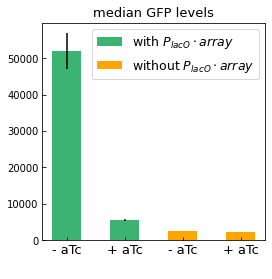

In [36]:
# Fig2b
fig=plt.figure(figsize=(4,4))
ax=fig.add_subplot(111)

ax.bar(x=['- aTc\n','+ aTc\n'],height=mean_[0:2],yerr=sem_[0:2],color='mediumseagreen',width=0.5,label='with $P_{lacO}\cdot array$')
ax.bar(x=['- aTc','+ aTc'],height=mean_[2:],yerr=sem_[2:],color='orange',width=0.5,label='without $P_{lacO}\cdot array$')

ax.set_title('median GFP levels',fontsize=13)
ax.tick_params(direction='in')
ax.tick_params(axis='x',labelsize=13)
ax.legend(loc='upper right',fontsize=12.5)

In [46]:
# 0614 data
gatefrac=0.8
indx=list(np.arange(2,12))

pAJM1642_C1_gated=[]
for i in indx:
    newname='R_PF_trial1_conc'+str(i-2)+'.fcs'
    tmp=FC.io.FCSData(Fig2d_folder_+newname)
    tmp_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)
    pAJM1642_C1_gated.append(tmp_gated)


pAJM1642_C2_gated=[]
for i in indx:
    newname='R_PF_trial2_conc'+str(i-2)+'.fcs'
    tmp=FC.io.FCSData(Fig2d_folder_+newname)
    tmp_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)
    pAJM1642_C2_gated.append(tmp_gated)

    
pAJM1642_C3_gated=[]
for i in indx:
    newname='R_PF_trial3_conc'+str(i-2)+'.fcs'
    tmp=FC.io.FCSData(Fig2d_folder_+newname)
    tmp_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)
    pAJM1642_C3_gated.append(tmp_gated)

#----------------

R_C1_gated=[]
for i in indx:
    newname='R_OL_trial1_conc'+str(i-2)+'.fcs'
    tmp=FC.io.FCSData(Fig2d_folder_+newname)
    tmp_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)
    R_C1_gated.append(tmp_gated)


R_C3_gated=[]
for i in indx:
    newname='R_OL_trial2_conc'+str(i-2)+'.fcs'
    tmp=FC.io.FCSData(Fig2d_folder_+newname)
    tmp_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)
    R_C3_gated.append(tmp_gated)
    

R_C2_gated=[]
for i in indx:
    newname='R_OL_trial3_conc'+str(i-2)+'.fcs'
    tmp=FC.io.FCSData(Fig2d_folder_+newname)
    tmp_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)
    R_C2_gated.append(tmp_gated)

Text(0.5, 1.0, 'open loop')

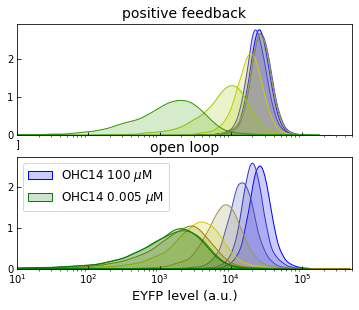

In [50]:
# Fig S25

fig=plt.figure(figsize=(6,4.5))
alpha_=0.2

#-----------
ax=fig.add_subplot(211)
ax.set_xscale('log')

sns.kdeplot(R_C1_gated[0][:,'FL1-A'],color=[0.0,0.0,1.0],fill=1,alpha=alpha_)
sns.kdeplot(R_C1_gated[1][:,'FL1-A'],color=[0.2,0.2,0.8],fill=1,alpha=alpha_)
sns.kdeplot(R_C1_gated[3][:,'FL1-A'],color=[0.3,0.3,0.7],fill=1,alpha=alpha_)
sns.kdeplot(R_C1_gated[4][:,'FL1-A'],color=[0.6,0.6,0.3],fill=1,alpha=alpha_)
sns.kdeplot(R_C1_gated[5][:,'FL1-A'],color=[0.8,0.8,0.0],fill=1,alpha=alpha_)
sns.kdeplot(R_C1_gated[6][:,'FL1-A'],color=[0.6,0.8,0.0],fill=1,alpha=alpha_)
sns.kdeplot(R_C1_gated[7][:,'FL1-A'],color=[0.4,0.8,0.0],fill=1,alpha=alpha_)
sns.kdeplot(R_C1_gated[8][:,'FL1-A'],color=[0.2,0.6,0.0],fill=1,alpha=alpha_)
sns.kdeplot(R_C1_gated[9][:,'FL1-A'],color=[0.0,0.5,0.0],fill=1,alpha=alpha_)

ax.set_xlim([10**1,0.5*10**6])
ax.set_ylabel('')
ax.set_xticklabels('[]')
ax.tick_params(direction='in')
ax.set_title('positive feedback',fontsize=14)
#========================
ax=fig.add_subplot(212)
ax.set_xscale('log')

sns.kdeplot(pAJM1642_C1_gated[0][:,'FL1-A'],color=[0.0,0.0,1.0],fill=1,alpha=alpha_,label='OHC14 100 $\mu$M')
sns.kdeplot(pAJM1642_C1_gated[1][:,'FL1-A'],color=[0.2,0.2,0.8],fill=1,alpha=alpha_)
sns.kdeplot(pAJM1642_C1_gated[3][:,'FL1-A'],color=[0.3,0.3,0.7],fill=1,alpha=alpha_)
sns.kdeplot(pAJM1642_C1_gated[4][:,'FL1-A'],color=[0.6,0.6,0.3],fill=1,alpha=alpha_)
sns.kdeplot(pAJM1642_C1_gated[5][:,'FL1-A'],color=[0.8,0.8,0.0],fill=1,alpha=alpha_)
sns.kdeplot(pAJM1642_C1_gated[6][:,'FL1-A'],color=[0.6,0.5,0.0],fill=1,alpha=alpha_)
sns.kdeplot(pAJM1642_C1_gated[7][:,'FL1-A'],color=[0.4,0.5,0.0],fill=1,alpha=alpha_)
sns.kdeplot(pAJM1642_C1_gated[8][:,'FL1-A'],color=[0.2,0.5,0.0],fill=1,alpha=alpha_)
sns.kdeplot(pAJM1642_C1_gated[9][:,'FL1-A'],color=[0.0,0.5,0.0],fill=1,alpha=alpha_,label='OHC14 0.005 $\mu$M')
ax.legend(loc='upper left',fontsize=12)

ax.set_xlim([10**1,0.5*10**6])
ax.set_ylabel('')
ax.set_xlabel('EYFP level (a.u.)',fontsize=13)
ax.tick_params(direction='in')
ax.set_title('open loop',fontsize=14)


In [51]:
OHC14_levels_=[100.0]
for i in range(0,9):
    OHC14_levels_.append(OHC14_levels_[-1]/3.0)
OHC14_levels=np.flip(np.array(OHC14_levels_))
OHC14_levels

array([5.08052634e-03, 1.52415790e-02, 4.57247371e-02, 1.37174211e-01,
       4.11522634e-01, 1.23456790e+00, 3.70370370e+00, 1.11111111e+01,
       3.33333333e+01, 1.00000000e+02])

In [54]:
median_R=(channel_median(R_C1_gated,'FL1-A'),\
          channel_median(R_C2_gated,'FL1-A'),\
          channel_median(R_C3_gated,'FL1-A'),\
        )
mean_R=np.mean(median_R,axis=0)
std_R=np.std(median_R,axis=0)
sem_R=stats.sem(median_R)
#----
median_pAJM=(channel_median(pAJM1642_C1_gated,'FL1-A'),\
             channel_median(pAJM1642_C2_gated,'FL1-A'),\
             channel_median(pAJM1642_C3_gated,'FL1-A'),\
            )
mean_pAJM=np.mean(median_pAJM,axis=0)
std_pAJM=np.std(median_pAJM,axis=0)
sem_pAJM=stats.sem(median_pAJM)

Fitting parameters for receiver transfer function:
R_PF:  [2.83223032e-01 3.95317073e-02 2.25347249e+04 1.97011244e+00]
R_OL:  [3.40821290e+00 7.23205470e-03 2.56647450e+04 8.09523537e-01]


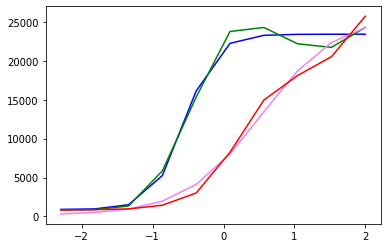

In [59]:
#fitting, Table 1, column1-2
b_range=([0,0,0,0.0],[1.5e3,0.5,3e4,5.0])

ydata=mean_R
coef_R,_=curve_fit(transf_pos,OHC14_levels,ydata,bounds=b_range)
ym=coef_R
y_fit_R=transf_pos(OHC14_levels,ym[0],ym[1],ym[2],ym[3])


plt.plot(np.log10(OHC14_levels),y_fit_R,color='b')
plt.plot(np.log10(OHC14_levels),ydata,color='g')

#-------
ydata=mean_pAJM
coef_pAJM,_=curve_fit(transf_pos,OHC14_levels,ydata,bounds=b_range)
ym=coef_pAJM
y_fit_pAJM=transf_pos(OHC14_levels,ym[0],ym[1],ym[2],ym[3])


plt.plot(np.log10(OHC14_levels),y_fit_pAJM,color='violet')
plt.plot(np.log10(OHC14_levels),ydata,color='r')

print('Fitting parameters for receiver transfer function:')
print('R_PF: ',coef_R)
print('R_OL: ',coef_pAJM)

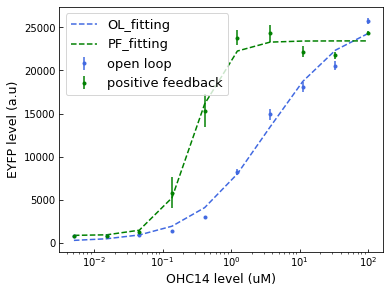

In [60]:
# Fig2d 

fig=plt.figure(figsize=(5.8,4.5))
ax=fig.add_subplot(111)
ax.set_xscale('log')

ax.errorbar(OHC14_levels,mean_pAJM,yerr=sem_pAJM,fmt='.',color='royalblue',label='open loop')
ax.errorbar(OHC14_levels,mean_R,yerr=sem_R,c='g',fmt='.',label='positive feedback')

ax.plot(OHC14_levels,y_fit_pAJM,c='royalblue',ls='--',label='OL_fitting')
ax.plot(OHC14_levels,y_fit_R,c='g',ls='--',label='PF_fitting')

#---------------
ax.set_ylabel('EYFP level (a.u)',fontsize=12.5)
ax.set_xlabel('OHC14 level (uM)',fontsize=12.5)

ax.tick_params(direction='in')
ax.set_xscale('log')

ax.legend(loc='upper left',fontsize=13)